Figura 1:
Forma: Cuadrado
Área: 12.15 cm²
Momentos de Hu: [ 0.19894  0.0118   0.       0.       0.      -0.       0.     ]

Figura 2:
Forma: Circulo
Área: 8.37 cm²
Momentos de Hu: [ 1.593e-01  4.000e-05  0.000e+00  0.000e+00 -0.000e+00 -0.000e+00
  0.000e+00]

Figura 3:
Forma: Cuadrado
Área: 7.83 cm²
Momentos de Hu: [0.16816 0.00049 0.      0.      0.      0.      0.     ]

Figura 4:
Forma: Triángulo
Área: 4.77 cm²
Momentos de Hu: [ 1.9218e-01  6.0000e-05  4.4900e-03  0.0000e+00  0.0000e+00  0.0000e+00
 -0.0000e+00]



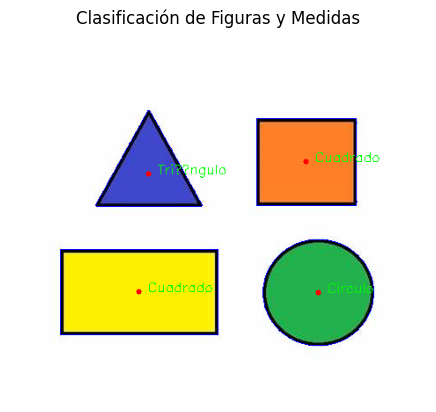

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

pix_per_cm = 37.8 

imagen = cv2.imread("td.jpg")
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
ret, bin = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
contorno, jerarquia = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

perimetro_cm = []
area_cm2 = []

for i, cnt in enumerate(contorno):
    M = cv2.moments(cnt)

    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    perimetro = cv2.arcLength(cnt, True)
    area = cv2.contourArea(cnt)

    perimetro_cm.append(perimetro / pix_per_cm)
    area_cm2.append(area / (pix_per_cm ** 2))

    approx = cv2.approxPolyDP(cnt, 0.04 * perimetro, True)
    vertices = len(approx)

    if vertices == 3:
        forma = "Triángulo"
    elif vertices == 4:
        forma = "Cuadrado"
    elif vertices > 4:
        forma = "Circulo"
    else:
        forma = "Desconodioda"

    hu = cv2.HuMoments(M).flatten()

    cv2.drawContours(imagen, [cnt], -1, (255, 0, 0), 1)
    cv2.circle(imagen, (cx, cy), 3, (0, 0, 255), -1)
    cv2.putText(imagen, f"{forma}", (cx + 10, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    print(f"Figura {i+1}:")
    print(f"Forma: {forma}")
    print(f"Área: {area / (pix_per_cm ** 2):.2f} cm²")
    print(f"Momentos de Hu: {np.round(hu, 5)}")
    print()

plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Clasificación de Figuras y Medidas")
plt.axis('off')
plt.show()
